In [2]:
from random import gauss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import erf
import time
from numba import vectorize
%matplotlib inline

Here I am defining the walkers in walkertime and a function to loop on them callled crossings

In [3]:
mu = 0.
DS = 0.0001
sigma = np.sqrt(DS)
deltacrit = 1.69
maxs = 100
# This is needed to not get a really high crossing time
maxstep = 10000
@vectorize(['float32(float32)'], target='parallel')
#@vectorize(['float32(float32)'], target='cuda')
def walkertime(deltacrit):
    step = 0
    delta = 0.
    S = 0.
    while delta<deltacrit and S < maxs:
            delta += gauss(mu,sigma)
            S += DS
    return S

In [17]:
vec_size = 15000
deltacvec=np.zeros(vec_size, dtype=np.float32)
deltacvec=deltacvec+deltacrit
start_time = time.time()
crossing = walkertime(deltacvec)
print("--- %s seconds ---" % (time.time() - start_time))

--- 19.3899729252 seconds ---


In [5]:
print crossing[2:30]

[ 13.9787  49.8555   5.5124  99.1392  37.9267   7.3904 100.       6.3404
   4.4351  35.573    2.6064  12.0484 100.       4.4801   7.2973 100.
   5.6584   2.641   13.9735   6.1443  90.5421 100.       8.0356   1.4716
   4.0047  55.1435  27.6123 100.    ]


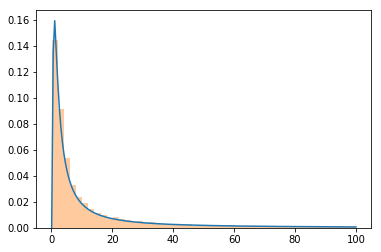

In [18]:
# Defining the theoretical distribution to compare with the simulation 
smin = 0.1
lins = np.linspace(smin,maxs,200)
nuspace = deltacrit/np.sqrt(lins)
distribution = nuspace*np.exp(-nuspace**2/2)/(np.sqrt(2*np.pi)*lins)
plt.plot(lins,distribution)

#Parece que se necesita mucho para llegar a una distribucion bonita
crossing =np.array(crossing)
crossingfiltered = crossing[(crossing < 100)]
sns.distplot(crossingfiltered,kde=False,norm_hist=True)
#plt.plot(lins,distribution)